In [2]:
import numpy as np
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from nltk.stem.porter import PorterStemmer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [5]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [6]:
news_data = pd.read_csv('./drive/MyDrive/train.csv')

In [7]:
news_data.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [8]:
news_data.shape

(20800, 5)

In [9]:
news_data.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [10]:
news_data = news_data.fillna('')

In [11]:
news_data.isnull().sum()

id        0
title     0
author    0
text      0
label     0
dtype: int64

In [12]:
# merging the author name and news title
news_data['content'] = news_data['author']+' '+news_data['title']+ ' '+news_data['text']

In [13]:
news_data.shape

(20800, 6)

In [14]:
news_data.head()

,id,title,author,text,label,content
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,Darrell Lucus House Dem Aide: We Didn’t Even S...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,Consortiumnews.com Why the Truth Might Get You...
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,Jessica Purkiss 15 Civilians Killed In Single ...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,Howard Portnoy Iranian woman jailed for fictio...


In [15]:
news_data.isnull().sum()

id         0
title      0
author     0
text       0
label      0
content    0
dtype: int64

In [16]:
news_data = news_data.fillna('')

In [17]:
news_data.isnull().sum()

id         0
title      0
author     0
text       0
label      0
content    0
dtype: int64

In [18]:
print(news_data['content'])

0        Darrell Lucus House Dem Aide: We Didn’t Even S...
1        Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo...
2        Consortiumnews.com Why the Truth Might Get You...
3        Jessica Purkiss 15 Civilians Killed In Single ...
4        Howard Portnoy Iranian woman jailed for fictio...
                               ...                        
20795    Jerome Hudson Rapper T.I.: Trump a ’Poster Chi...
20796    Benjamin Hoffman N.F.L. Playoffs: Schedule, Ma...
20797    Michael J. de la Merced and Rachel Abrams Macy...
20798    Alex Ansary NATO, Russia To Hold Parallel Exer...
20799    David Swanson What Keeps the F-35 Alive   Davi...
Name: content, Length: 20800, dtype: object


In [19]:
X = news_data.drop(columns='label', axis=1)
Y = news_data['label']

In [20]:
Y.value_counts()

1    10413
0    10387
Name: label, dtype: int64

In [21]:
X.shape

(20800, 5)

In [22]:
Y.shape

(20800,)

In [23]:
print(X)
print(Y)

          id                                              title  \
0          0  House Dem Aide: We Didn’t Even See Comey’s Let...   
1          1  FLYNN: Hillary Clinton, Big Woman on Campus - ...   
2          2                  Why the Truth Might Get You Fired   
3          3  15 Civilians Killed In Single US Airstrike Hav...   
4          4  Iranian woman jailed for fictional unpublished...   
...      ...                                                ...   
20795  20795  Rapper T.I.: Trump a ’Poster Child For White S...   
20796  20796  N.F.L. Playoffs: Schedule, Matchups and Odds -...   
20797  20797  Macy’s Is Said to Receive Takeover Approach by...   
20798  20798  NATO, Russia To Hold Parallel Exercises In Bal...   
20799  20799                          What Keeps the F-35 Alive   

                                          author  \
0                                  Darrell Lucus   
1                                Daniel J. Flynn   
2                             Consortiu

In [24]:
port_stem = PorterStemmer()

In [25]:
def stemming(content):
    review = re.sub('[^a-zA-Z]',' ',content)
    review = review.lower()
    review = review.split()
    review = [port_stem.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    return review

In [26]:
#@title
news_data['content'] = news_data['content'].apply(stemming)

In [27]:
print(news_data['content'])

0        darrel lucu hous dem aid even see comey letter...
1        daniel j flynn flynn hillari clinton big woman...
2        consortiumnew com truth might get fire truth m...
3        jessica purkiss civilian kill singl us airstri...
4        howard portnoy iranian woman jail fiction unpu...
                               ...                        
20795    jerom hudson rapper trump poster child white s...
20796    benjamin hoffman n f l playoff schedul matchup...
20797    michael j de la merc rachel abram maci said re...
20798    alex ansari nato russia hold parallel exercis ...
20799    david swanson keep f aliv david swanson author...
Name: content, Length: 20800, dtype: object


In [28]:
X = news_data['content'].values
Y = news_data['label'].values

In [29]:
print(X)

['darrel lucu hous dem aid even see comey letter jason chaffetz tweet hous dem aid even see comey letter jason chaffetz tweet darrel lucu octob subscrib jason chaffetz stump american fork utah imag courtesi michael jolley avail creativ common licens apolog keith olbermann doubt worst person world week fbi director jame comey accord hous democrat aid look like also know second worst person well turn comey sent infam letter announc fbi look email may relat hillari clinton email server rank democrat relev committe hear comey found via tweet one republican committe chairmen know comey notifi republican chairmen democrat rank member hous intellig judiciari oversight committe agenc review email recent discov order see contain classifi inform long letter went oversight committe chairman jason chaffetz set polit world ablaz tweet fbi dir inform fbi learn exist email appear pertin investig case reopen jason chaffetz jasoninthehous octob cours know case comey actual say review email light unrel 

In [30]:
print(Y)

[1 0 1 ... 0 1 1]


In [31]:
Y.shape

(20800,)

In [32]:
vectorizer = TfidfVectorizer()
vectorizer.fit(X)
X = vectorizer.transform(X)

In [33]:
X.shape

(20800, 111501)

In [34]:
print(X)

  (0, 109752)	0.049158312425168854
  (0, 109697)	0.0190646711515277
  (0, 108742)	0.04416544119908134
  (0, 108738)	0.09477494042884232
  (0, 108695)	0.03758488097939004
  (0, 108658)	0.01130614774071694
  (0, 108007)	0.017092546683505856
  (0, 107190)	0.017105936674103112
  (0, 107099)	0.012543234221230963
  (0, 107013)	0.029126417104928328
  (0, 106934)	0.012863319680563097
  (0, 106734)	0.011771716334271506
  (0, 105884)	0.025727197929110487
  (0, 105848)	0.031296701378124764
  (0, 104837)	0.02153649554212262
  (0, 103422)	0.06544555398259812
  (0, 102736)	0.03314918847150756
  (0, 102485)	0.01639612818098454
  (0, 101717)	0.038071924979380216
  (0, 101077)	0.011082403436475742
  (0, 101067)	0.0432044670628921
  (0, 101014)	0.13602128375819167
  (0, 100866)	0.0713092337063475
  (0, 99577)	0.03944988916619374
  (0, 99009)	0.027120358929731154
  :	:
  (20799, 7470)	0.010635431711878486
  (20799, 7143)	0.02816704434978389
  (20799, 6848)	0.03959171777516513
  (20799, 6810)	0.0253655855

In [35]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size = 0.2, stratify=Y, random_state=2)

In [36]:
X_train.shape


(16640, 111501)

In [37]:
X_test.shape

(4160, 111501)

In [38]:
#MATRIZ
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Purples):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [39]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import numpy as np
import itertools

In [40]:
model = MultinomialNB()
model.fit(X_train,Y_train)
predictions = model.predict(X_test)


In [41]:
predictions

array([1, 0, 1, ..., 1, 0, 0])

In [42]:
score = metrics.accuracy_score(Y_test, predictions)

accuracy:   0.880
Confusion matrix, without normalization


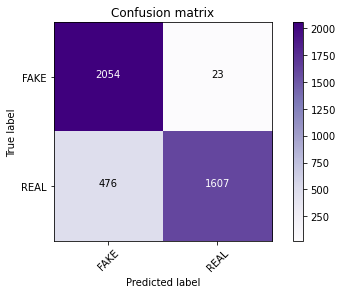

In [43]:
print("accuracy:   %0.3f" % score)
cm1 = metrics.confusion_matrix(Y_test, predictions)
plot_confusion_matrix(cm1, normalize=False, classes=['FAKE', 'REAL'])

In [44]:
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X, Y,test_size = 0.3, stratify=Y, random_state=2)

In [45]:
model1 = MultinomialNB()
model1.fit(X1_train,Y1_train)
predictions1 = model1.predict(X1_test)
score1 = metrics.accuracy_score(Y1_test, predictions1)

accuracy:   0.876
Confusion matrix, without normalization


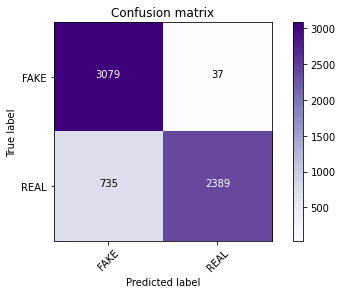

In [46]:
print("accuracy:   %0.3f" % score1)
cm11 = metrics.confusion_matrix(Y1_test, predictions1)
plot_confusion_matrix(cm11, normalize=False, classes=['FAKE', 'REAL'])